# Wrangling the Data

Real world data has problems. The most obvious, that we have seen multiple times so far is the presence of missing or incomplete data. Invalid or innaccurate data is a somewhat less common and much harder to detect problem (as we have discussed before we need to approach rejecting data with great caution). 

We will take this class to discuss a broad approach to data and cover some common problems that come up for various types of data. We will end with an introduction to dealing with strings and images, two types of data that Python provides powerful tools for working with.

## Formatting the Data

Putting aside the issue of Big Data (data that is so large that it cannot be loaded into a pandas.DataFrame all at once), the main goal in formatting the data is to set it up so that it can be represented by a pandas.DataFrame structure. Most of the examples we have seen in class have been delivered as CSV files that are ready to be read into a dataframe. The primary exceptions so far have been the Berlin Airbnb data that arrived as multiple cross referenced CSV files, and the image recognition example whose data was a collection of JPG files.

We will consider the Airbnb data:

In [126]:
import numpy as np
import pandas as pa
import seaborn as sn

In [97]:
# First we get a link from drop box
# https://www.dropbox.com/s/lqin9zpgfwyt924/calendar_summary.csv?dl=0

# The trick here is that the last digit 'dl=0' needs to be changed to 'dl=1' and then 
# we just feed it into pandas.read_csv as we have above.

# This takes a while - it is downloading the information and then processing it, and it is more data
# than our other examples have used.

calendar = pa.read_csv('https://www.dropbox.com/s/lqin9zpgfwyt924/calendar_summary.csv?dl=1')
listings_sum = pa.read_csv('https://www.dropbox.com/s/5noljx9qipcyyul/listings_summary.csv?dl=1')
listings = pa.read_csv('https://www.dropbox.com/s/xtkx018qxjfjlah/listings.csv?dl=1')
neighborhoods = pa.read_csv('https://www.dropbox.com/s/rfqozggf5f2kzlu/neighbourhoods.csv?dl=1')
reviews_sum = pa.read_csv('https://www.dropbox.com/s/o8gvfm708g1cocf/reviews_summary.csv?dl=1')
reviews = pa.read_csv('https://www.dropbox.com/s/8dfu8qyc6n6cw3p/reviews.csv?dl=1')

In [98]:
listings.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
22547,29856708,Cozy Apartment right in the center of Berlin,87555909,Ulisses,Mitte,Brunnenstr. Süd,52.533865,13.400731,Entire home/apt,60,2,0,NaN,NaN,1,314
22548,29857108,Altbau/ Schöneberger Kiez / Schlafsofa,67537363,Jörg,Tempelhof - Schöneberg,Schöneberg-Nord,52.496211,13.341738,Shared room,20,1,0,NaN,NaN,6,78
22549,29864272,Artists loft with garden in the center of Berlin,3146923,Martin,Pankow,Prenzlauer Berg Südwest,52.531800,13.411999,Entire home/apt,85,3,0,NaN,NaN,2,15
22550,29866805,Room for two with private shower / WC,36961901,Arte Luise,Mitte,Alexanderplatz,52.520802,13.378688,Private room,99,1,0,NaN,NaN,3,6
22551,29867352,"Sunny, modern and cozy flat in Berlin Neukölln :)",177464875,Sebastian,Neukölln,Schillerpromenade,52.473762,13.424447,Private room,45,5,0,NaN,NaN,1,21


In [99]:
# There are many entries in Calendar.price that are NaN. It is not clear what that means
calendar = calendar[pa.notna(calendar.price)]

# Given an listing_id we get when it was booked and for what price
calendar[calendar.listing_id==29857108]

,listing_id,date,available,price
8212563,29857108,2019-02-04,t,$17.00
8212564,29857108,2019-02-03,t,$17.00
8212565,29857108,2019-02-02,t,$18.00
8212566,29857108,2019-02-01,t,$18.00
8212567,29857108,2019-01-31,t,$17.00
8212568,29857108,2019-01-30,t,$17.00
8212569,29857108,2019-01-29,t,$17.00
8212570,29857108,2019-01-28,t,$17.00
8212571,29857108,2019-01-27,t,$17.00
8212572,29857108,2019-01-26,t,$18.00


In [100]:
# For each list we could compute the mean of its price. When you first do it, you get an error
# because the price has been read as a string.

# So first we need to convert these strings to floats/integers
# The first character is '$' so we skip that one;
# Some of them also contain ',' if they are in the thousands in price.
np.mean([float(x[1:].replace(',', '')) for x in calendar.price[calendar.listing_id==29857108]])

17.141025641025642

In [101]:
# Let's go through the listing data and add the mean price for each listing:

for x in listings.index:
    bookings = calendar.price[calendar.listing_id==listings.loc[x, 'id']]
    listings.loc[x, 'mean_price'] = np.mean(
        [float(x[1:].replace(',', '')) for x in bookings])
    listings.loc[x, 'number_of_bookings'] = len(bookings)
    
# I'm going to ignore the warning that comes up. The way to fix it is to checking that bookings
# is not empty beroe passing it to the next two statements.

/anaconda3/envs/jupyterlab/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/jupyterlab/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [102]:
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,mean_price,number_of_bookings
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141,81.900709,141.0
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0,NaN,0.0
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220,90.000000,220.0
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,2018-08-16,0.39,1,297,27.131313,297.0
4,7071,BrightRoom with sunny greenview!,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,2018-11-04,1.75,1,26,44.384615,26.0


In [103]:
# We should drop the listings that had no bookings, for one thing their price is obviously not telling us 
# something real (Lesson #1 from Pawn Stars)

listings = listings[listings.number_of_bookings!=0]

So to recap in this example we have shown the following *Data Wrangling* techniques:

- Cross referencing one dataframe with another
- Unpacking a number represented as a string using some of the string tools from Python
- Computing a new feature from other data
- Removing NaN values

What could we do with this new information. Consider the neighborhoods, what is the mean price in each neighborhood.

In [108]:
# Make a list of all the neighborhoods (note that the data gave us a list, but it is safer to take the
# actual values from the feature). Though to be super careful we should take some time to check 
# that they have been coded correctly.

# I pass it through set to eliminate duplicates, then I convert it to a data frame
nbhds = pa.DataFrame(set(listings.neighbourhood), columns = ['Neighbourhood'])
nbhds.head()

,Neighbourhood
0,West 5
1,Müggelheim
2,Nord 2
3,Mahlsdorf
4,Hellersdorf-Süd


In [130]:
# now for each neighborhood compute the mean and standard deviation of the price paid
# Note that this means we have to unpack the mean price we computed for each booking by the number
# of booksings; we will also need the total number of bookings for each neighborhood.
save = []

for x in nbhds.index:
    nbook = []
    xlist = listings.id[listings.neighbourhood==nbhds.loc[x, 'Neighbourhood']]
    for l in xlist:
        bookings_price = calendar.price[calendar.listing_id==l]
        bookings = [float(x[1:].replace(',', '')) for x in bookings_price]
        nbook += bookings
       
    nbhds.loc[x, 'bookings'] = len(nbook)
    nbhds.loc[x, 'mean_price'] = np.mean(nbook)
    nbhds.loc[x, 'sdv_price'] = np.std(nbook)
    nbhds.loc[x, 'median_price'] = np.median(nbook)
    if np.std(nbook)>np.mean(nbook):
        save += [nbook]
    
    
nbhds.tail()

,Neighbourhood,bookings,mean_price,sdv_price,median_price
131,Neue Kantstraße,16334.0,96.301212,139.781889,65.0
132,Schöneberg-Nord,59269.0,90.230576,160.320389,60.0
133,Karl-Marx-Allee-Nord,17639.0,70.489200,49.409234,60.0
134,Pankow Süd,14133.0,52.547018,36.452571,40.0
135,Marzahn-Mitte,1081.0,19.202590,4.448142,21.0


Note that there are some mismatches between mean and standard deviation. I have pulled out one of them so we can check on what is happening. What we see is that the distribution of prices in a neighborhood are not normal.

This is an example where Median and Percentiles may be a better notion of center and spread of the data

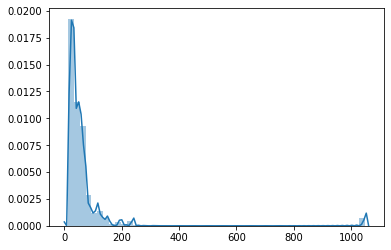

In [131]:
sn.distplot(save[0]);

## Dealing with Strings

Now we will consider some techniques for dealing with strings. Attached to the Berlin Airbnb data is a set of reviewer comments for eaching listing. Again we need to cross reference this list with the listing id.

In [145]:
import string

In [136]:
listingreview = reviews_sum.comments[reviews_sum.listing_id == 2015]
listingreview[0:5]

0    Mein Freund und ich hatten gute gemütliche vie...
1    Jan was very friendly and welcoming host! The ...
2    Un appartement tres bien situé dans un quartie...
3    It is really nice area, food, park, transport ...
4    Buena ubicación, el departamento no está orden...
Name: comments, dtype: object

A common technique is to count the frequency of words and look for patterns. It is somewhat more complicated in this case because of the various languages being used. 

In [149]:
# make a list of the all the reviews used in a listing. Note that I am also removing any punctuation.

words = []
for x in listingreview:
    words += x.translate(str.maketrans('', '', string.punctuation)).split()

In [154]:
words[100:105]  # One issue is that people misspell words - a lot!

['area', 'is', 'sooo', 'amazing', 'lots']

In [165]:
# We do not care so much about words with only a few letters, so lets drop them.

words2 = pa.DataFrame([x for x in words if len(x)>3])
words2.loc[:, 'count'] = 1 # Add a counter
words2[1000:1005]

,0,count
1000,near,1
1001,public,1
1002,transport,1
1003,restaurants,1
1004,about,1


In [178]:
# Use groupby to collect them and sum up the count; and then sort

# Then send it through .sort_values to bring the top responses to the top

word_freq = words2.groupby([0]).sum().sort_values(by=['count'], ascending = False)
word_freq.head(10)

,count
0,
very,49
apartment,39
Berlin,34
location,30
sehr,30
stay,29
great,27
place,26
with,26


In [179]:
# We could make a function to produce the word frequency from a listing_id.

def word_freq(id):
    listingreview = reviews_sum.comments[reviews_sum.listing_id == id]
    words = []
    for x in listingreview:
        words += x.translate(str.maketrans('', '', string.punctuation)).split()
    words2 = pa.DataFrame([x for x in words if len(x)>3])
    words2.loc[:, 'count'] = 1 # Add a counter 
    
    return words2.groupby([0]).sum().sort_values(by=['count'], ascending = False)

In [195]:
id = 3309
print('Mean Price for this listing: {}'.format(listings.mean_price[listings.id == id].iloc[0]))
word_freq(id).head(10)

Mean Price for this listing: 27.13131313131313


,count
0,
Jana,25
with,16
Berlin,14
very,13
stay,11
place,11
room,11
there,10
Yana,9


In [196]:
id = 3176
print('Mean Price for this listing: {}'.format(listings.mean_price[listings.id == id].iloc[0]))
word_freq(id).head(10)

Mean Price for this listing: 90.0


,count
0,
very,98
apartment,97
great,93
with,80
Berlin,78
Britta,74
stay,71
flat,70
location,56


One problem you might notice if you do this enough is that not all listings have review comments.

- What could we do from here?
- What ideas do you have for dealing with the multiple languages?

## Dealing with Categorical Data

There are couple of techniques for working with categorical data you should be aware of. The major issue is that the algorithms in scikitlearn have been designed to work on categorical data represented as integers. This makes sense because the authors of the algorithms do not know what your categories are.

### Binary Data
The simplest case is a categorical variable that takes on only two values. These we can safetely code as a $0$ or $1$; or $-1$ or $1$ if that makes more sense for the problem.

In [215]:
# Consider the following dataset about homes that sold in a city in Iowa

hd = pa.read_csv('Data Sets/house-prices/train.csv')

hd.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [216]:
# For example the Street feature takes only two values
set(hd.Street)

{'Grvl', 'Pave'}

In [217]:
# We can recode it using a dictionary and .map()
Street_dict = {'Grvl':0, 'Pave':1, 0:0, 1:1}  
# Note we include the trivial coding of the new values as otherwise if we run this twice
# it produces NaN values for the Street feature.
hd.Street = hd.Street.map(Street_dict)
set(hd.Street)

{0, 1}

### Non Binary Data

Categorical data could be ordered or unordered. It is tempting to to take ordered data and code it as 0, 1, 2, 3. However we need ot be careful. Consider the following examples:

In [218]:
set(hd.Alley)

{'Grvl', 'Pave', nan}

nan in this case almost certainly means that the house does not have an Alley. Note that we could recode this feature as: 'Pave' = 1; 'Grvl'=0.5; and nan=0. 

However this implies that the difference between No Alley and a Gravel Alley is equal to the difference beetween a Gravel Alley and a Paved Alley, and we really have no way of judging that.

In [219]:
set(hd.ExterQual)

{'Ex', 'Fa', 'Gd', 'TA'}

For the Exterior Quality feature (and the other Quality 

## Dealing with Missing Data

We have covered a number of examples where we made the decision to drop samples that had missing data. This is not always ideal, for example we may not have a large number of samples to begin with (which makes dividing the sample into testing / training sets problematic), we may have a large number of features and the sample with missing data may still have valuable information, and the sample might have unique values for some features that we need to make our model complete.

Some other ideas for dealing with missing data:
- Using regression to fill in missing data. If the data field that is misisng is numerical we could use one of our regression techniques to compute an estimate for the missing value.
- Using categorization to fill in misssing data. If the data field that is missing is categorical we could use one of our categorization techniques to compute and estimate for the missing value.
- Using "Missing" as a category. If the data field that is missing is categorical, particularly if there are many missing it, we could use "Missing" or "NaN" as a value. In some cases (like surveys) this may even provide accurate information as sometimes no response is a response.
- Dropping the feature. An alternative to dropping samples is to drop the feature. This might be the right decision if you have plenty of other features, if it appears some other features are related to this one, and if there are many samples missing this feature.
- Separating the analysis. Finally you could run the analysis separately for samples missing this feature. 

## Dealing with Images